In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

In [18]:
import pandas as pd


data = pd.read_csv('C:/Users/rahul/Downloads/Steel_data.csv')


X = data = data.drop(columns=['WeekStatus'])
X = data = data.drop(columns=['date'])
X = data = data.drop(columns=['Day_of_week'])
y = data['Load_Type']


In [19]:

class_dict = {'Light_Load': 1, 'Medium_Load': 2, 'Maximum_Load': 3}

X['Load_Type'] = X['Load_Type'].map(class_dict)



In [20]:

data = data.drop(columns=[data.columns[-1]])

data.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
0,3.17,2.95,0.0,0.0,73.21,100.0,900
1,4.00,4.46,0.0,0.0,66.77,100.0,1800
2,3.24,3.28,0.0,0.0,70.28,100.0,2700
3,3.31,3.56,0.0,0.0,68.09,100.0,3600
4,3.82,4.50,0.0,0.0,64.72,100.0,4500


In [21]:
from sklearn.preprocessing import StandardScaler
import scipy

scaler = StandardScaler()

normalized_df = scaler.fit_transform(data)

normalized_df = pd.DataFrame(normalized_df, columns=data.columns)


In [22]:

samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(normalized_df, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [23]:
df = pd.DataFrame(samples)

df.head()

,0,1,2,3
0,Usage_kWh Lagging_Current_Reactive.Pow...,Usage_kWh Lagging_Current_Reactive.Pow...,5911 Maximum_Load 6803 Medium_Load 13...,11279 Maximum_Load 2473 Maximum_Load 48...
1,Usage_kWh Lagging_Current_Reactive.Pow...,Usage_kWh Lagging_Current_Reactive.Pow...,13076 Light_Load 2814 Light_Load 14...,858 Maximum_Load 2364 Medium_Load 57...
2,Usage_kWh Lagging_Current_Reactive.Pow...,Usage_kWh Lagging_Current_Reactive.Pow...,8828 Light_Load 3248 Medium_Load 13...,166 Maximum_Load 12600 Light_Load 48...
3,Usage_kWh Lagging_Current_Reactive.Pow...,Usage_kWh Lagging_Current_Reactive.Pow...,12496 Light_Load 11049 Light_Load 10...,13297 Medium_Load 948 Medium_Load 92...
4,Usage_kWh Lagging_Current_Reactive.Pow...,Usage_kWh Lagging_Current_Reactive.Pow...,2749 Medium_Load 14797 Light_Load 14...,2712 Light_Load 4912 Light_Load 98...


In [24]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])
     
     

In [25]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [26]:

for i, sample in enumerate(samples):
    best_accuracy = 0
    best_C = 0
    best_gamma = 0
    for kernel in kernels:
        X_train, X_test, y_train, y_test = sample
        C = np.random.uniform(0, 10)
        gamma = np.random.uniform(0, 10)
        svm_model = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
        svm_model.fit(X_train, y_train)
        y_pred = svm_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = round(accuracy, 2)
            best_C = round(C, 2)
            best_gamma = round(gamma, 2)
            best_kernel = kernel
    print(f'Best Accuracy: {best_accuracy}, Best Kernel: {best_kernel}, Best C: {best_C}, Best Gamma: {best_gamma}')
    result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]


c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Accuracy: 0.86, Best Kernel: rbf, Best C: 6.62, Best Gamma: 1.98


c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Accuracy: 0.87, Best Kernel: rbf, Best C: 4.63, Best Gamma: 8.38


c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Accuracy: 0.87, Best Kernel: rbf, Best C: 1.89, Best Gamma: 7.0


c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Accuracy: 0.86, Best Kernel: rbf, Best C: 9.71, Best Gamma: 4.15


c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Accuracy: 0.87, Best Kernel: rbf, Best C: 2.26, Best Gamma: 7.49


c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Accuracy: 0.83, Best Kernel: rbf, Best C: 3.59, Best Gamma: 1.47


c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Accuracy: 0.87, Best Kernel: rbf, Best C: 1.67, Best Gamma: 8.35


c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Accuracy: 0.86, Best Kernel: rbf, Best C: 4.35, Best Gamma: 1.72


c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Accuracy: 0.73, Best Kernel: rbf, Best C: 5.2, Best Gamma: 0.16


c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Accuracy: 0.84, Best Kernel: rbf, Best C: 1.02, Best Gamma: 2.17


In [27]:

result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.86,rbf,6.62,1.98
1,2,0.87,rbf,4.63,8.38
2,3,0.87,rbf,1.89,7.00
3,4,0.86,rbf,9.71,4.15
4,5,0.87,rbf,2.26,7.49
5,6,0.83,rbf,3.59,1.47
6,7,0.87,rbf,1.67,8.35
7,8,0.86,rbf,4.35,1.72
8,9,0.73,rbf,5.20,0.16
9,10,0.84,rbf,1.02,2.17


In [28]:
max_accuracy_idx = result['Best Accuracy'].idxmax()
X_train, X_test, y_train, y_test = samples[max_accuracy_idx]


In [29]:

train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))
     


In [30]:
train_mean = np.mean(train_scores, axis=1)

     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


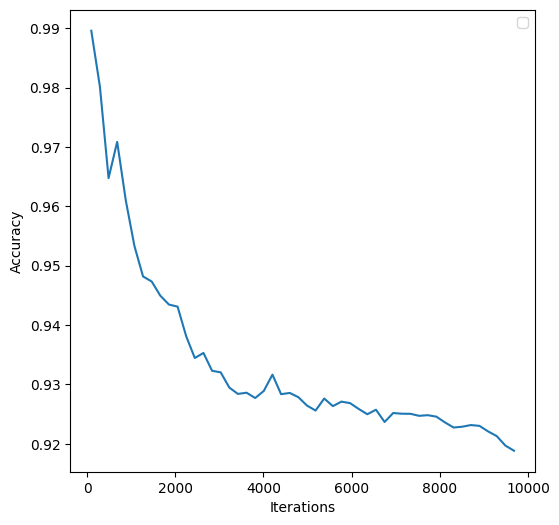

In [31]:

plt.figure(figsize=(6, 6))
plt.plot(train_sizes, train_mean)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()